In [10]:
from helper import Helper

x_train = Helper.load_csv('data/hw2p3_xtrain.csv')
y_train = Helper.load_csv('data/hw2p3_ytrain.csv')
x_test = Helper.load_csv('data/hw2p3_xtest.csv')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(10, 49)
(10, 49)
(1000, 1)


pandas.core.frame.DataFrame

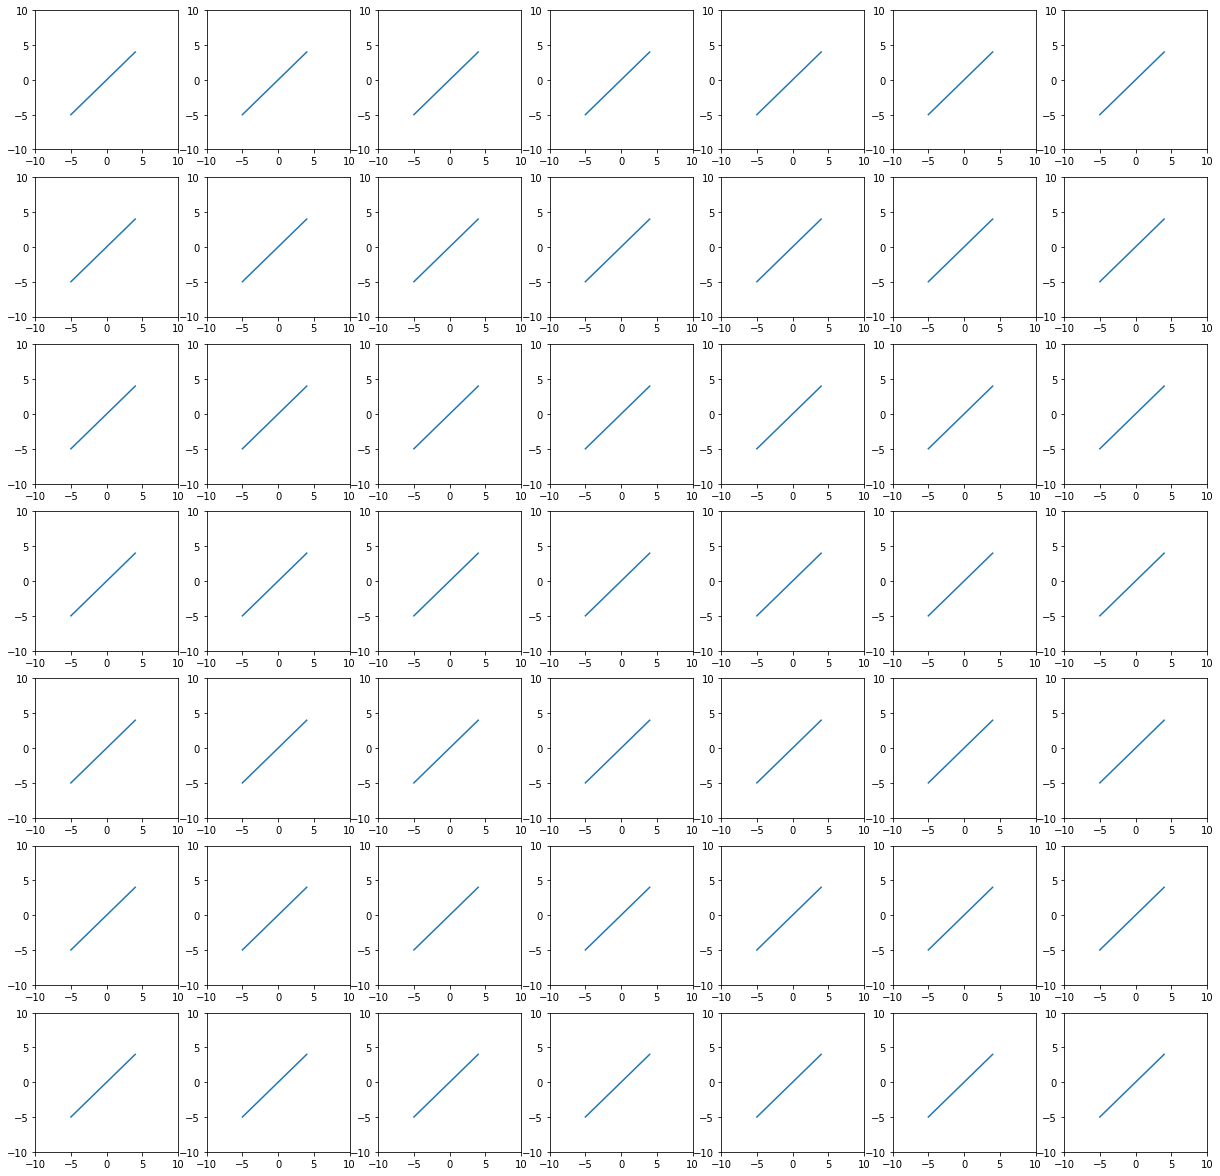

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = range(-5, 5)
y = range(-5, 5)

fig, ax = plt.subplots(nrows=7, ncols=7, figsize=(21,21))

for row in ax:
    for col in row:
        col.set_xlim([-10, 10])
        col.set_ylim([-10, 10])
        col.plot(x, y)

plt.show()